In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [7]:
data = pd.read_csv('test_data.csv')

In [8]:
data.head()

,Observation,Advertising,Sales
0,1,12,24
1,2,12,27
2,3,9,25
3,4,11,27
4,5,6,23


# Section A - Scatter Plot

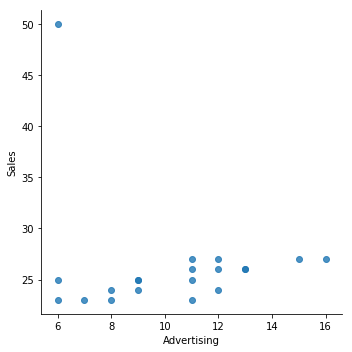

In [9]:
sns.lmplot('Advertising', 'Sales', data=data, fit_reg=False )

# Section B - Linear Model 

In [12]:
lm = LinearRegression()

In [17]:
x = data[['Advertising']]
y = data.Sales

In [18]:
lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
print('a = ', lm.intercept_)
print('b =', lm.coef_)

a =  29.6268933539
b = [-0.32457496]


Finding the MSE and t-stat

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
predictions = lm.predict(x)

In [26]:
print('SE = ', np.sqrt(mean_squared_error(y, predictions)))
print('T-stat = ', lm.coef_ / np.sqrt(mean_squared_error(y, predictions)))

SE =  5.53696584118
T-stat =  [-0.05861964]


# Section C - Residuals

In [27]:
residuals = predictions - y

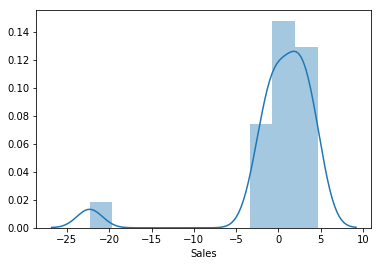

In [28]:
sns.distplot(residuals, bins=10)

# Section D - What's Wrong?

That large outlier residual is the result of a one time event that spiked traffic. This outlier may throw off the model, so we may want to remove it from the data.

# Section E - Refit Model

In [29]:
lm_new = LinearRegression()

In [31]:
data_new = data.drop([11])

In [33]:
x = data_new[['Advertising']]
y = data_new['Sales']

In [34]:
lm_new.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
print('a = ', lm_new.intercept_)
print('b =', lm_new.coef_)
predictions = lm_new.predict(x)
print('SE = ', np.sqrt(mean_squared_error(y, predictions)))
print('T-stat = ', lm_new.coef_ / np.sqrt(mean_squared_error(y, predictions)))

a =  21.125
b = [ 0.375]
SE =  0.996705098127
T-stat =  [ 0.37623967]
